In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [35]:
df=pd.read_csv('Attrition_data.csv')

In [36]:
df.head

<bound method NDFrame.head of       EmployeeID  Age Attrition     BusinessTravel              Department  \
0              1   51        No      Travel_Rarely                   Sales   
1              2   31       Yes  Travel_Frequently  Research & Development   
2              3   32        No  Travel_Frequently  Research & Development   
3              4   38        No         Non-Travel  Research & Development   
4              5   32        No      Travel_Rarely  Research & Development   
...          ...  ...       ...                ...                     ...   
4405        4406   42        No      Travel_Rarely  Research & Development   
4406        4407   29        No      Travel_Rarely  Research & Development   
4407        4408   25        No      Travel_Rarely  Research & Development   
4408        4409   42        No      Travel_Rarely                   Sales   
4409        4410   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [38]:
df.shape

(4410, 29)

In [39]:
df.isna().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [40]:
df = df.dropna()

In [41]:
df.isnull().sum()

EmployeeID                 0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [42]:
df.describe()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4300.000000,4300.000000,4300.000000,4300.000000,4300.0,4300.000000,4300.000000,4300.000000,4300.000000,4300.0,...,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,2211.695116,36.926977,9.197907,2.913256,1.0,2.066977,65059.844186,2.690000,15.210698,8.0,...,11.285116,2.796279,7.026047,2.190000,4.132558,2.723953,2.724884,2.761163,2.728837,3.153953
std,1272.117692,9.146517,8.097059,1.024774,0.0,1.106633,47045.398914,2.495764,3.662777,0.0,...,7.790052,1.290142,6.148036,3.230818,3.565831,1.093802,1.101875,0.707800,0.710769,0.360946
min,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1110.750000,30.000000,2.000000,2.000000,1.0,1.000000,29260.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2215.500000,36.000000,7.000000,3.000000,1.0,2.000000,49360.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3314.250000,43.000000,14.000000,4.000000,1.0,3.000000,83802.500000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.250000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4409.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [43]:
# Calculate the current attrition rate
attrition_rate = (df['Attrition'] == 'Yes').mean() * 100
print(f"\
Current attrition rate: {attrition_rate:.2f}%")

Current attrition rate: 16.16%


In [44]:
df.head(10)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
5,6,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,Female,...,28.0,5,7,7,7,3.0,2.0,2.0,3,3
6,7,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,Male,...,5.0,2,0,0,0,1.0,3.0,1.0,3,4
7,8,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,Male,...,10.0,2,0,0,0,1.0,2.0,3.0,3,4
8,9,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,Male,...,10.0,2,9,7,8,2.0,4.0,3.0,3,4
9,10,25,No,Non-Travel,Research & Development,7,4,Medical,1,Female,...,6.0,2,6,1,5,2.0,1.0,3.0,3,3


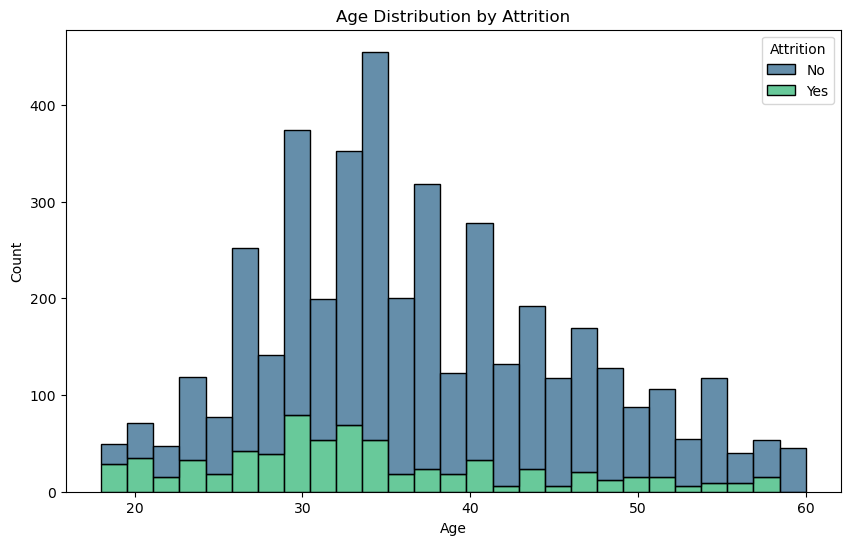

In [48]:
# Visualize the distribution of age and its relation to attrition
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', palette='viridis')
plt.title('Age Distribution by Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


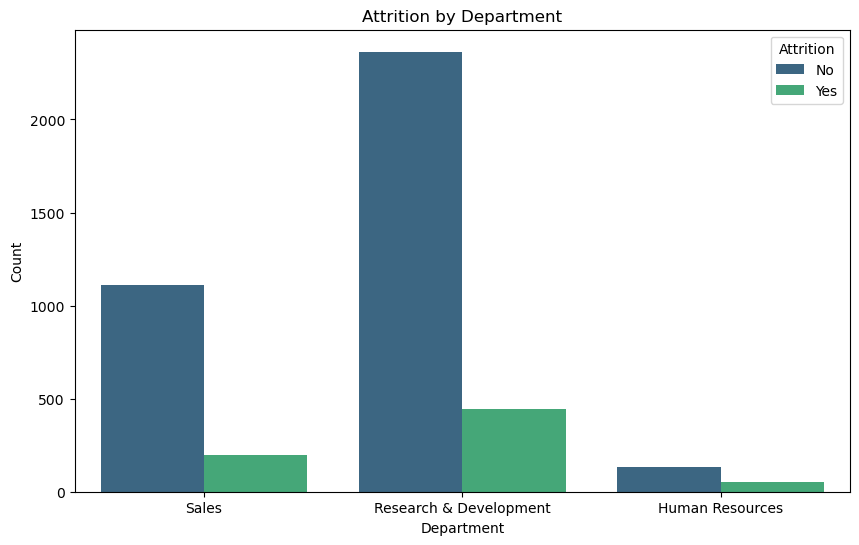

In [47]:
# Visualize attrition by department
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Department', hue='Attrition', palette='viridis')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

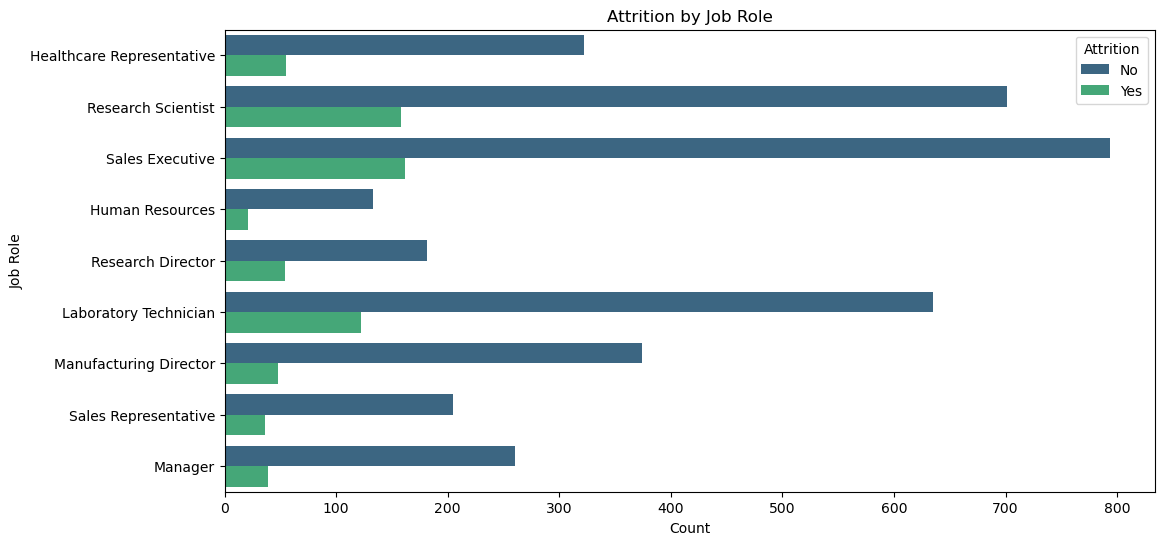

In [50]:
# Visualize attrition by job role
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='JobRole', hue='Attrition', palette='viridis')
plt.title('Attrition by Job Role')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.show()

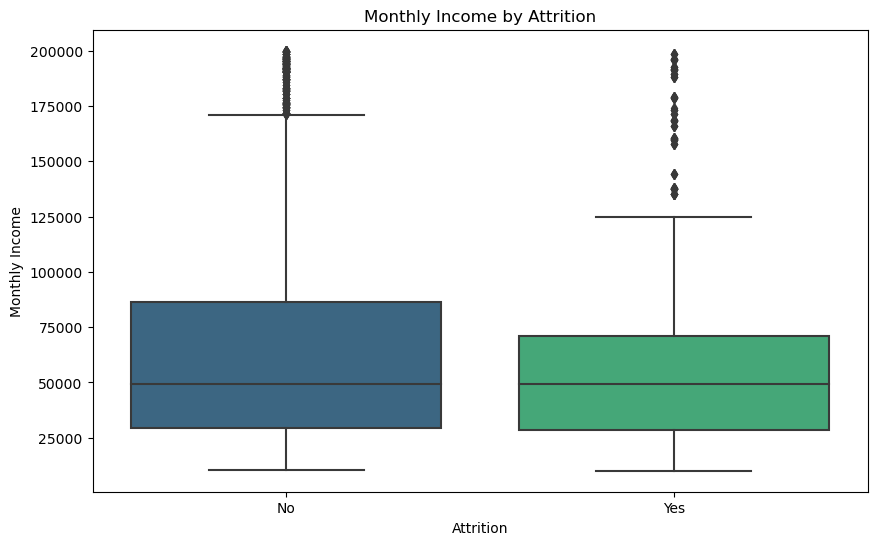

In [51]:
# Visualize the distribution of monthly income and its relation to attrition
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='viridis')
plt.title('Monthly Income by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

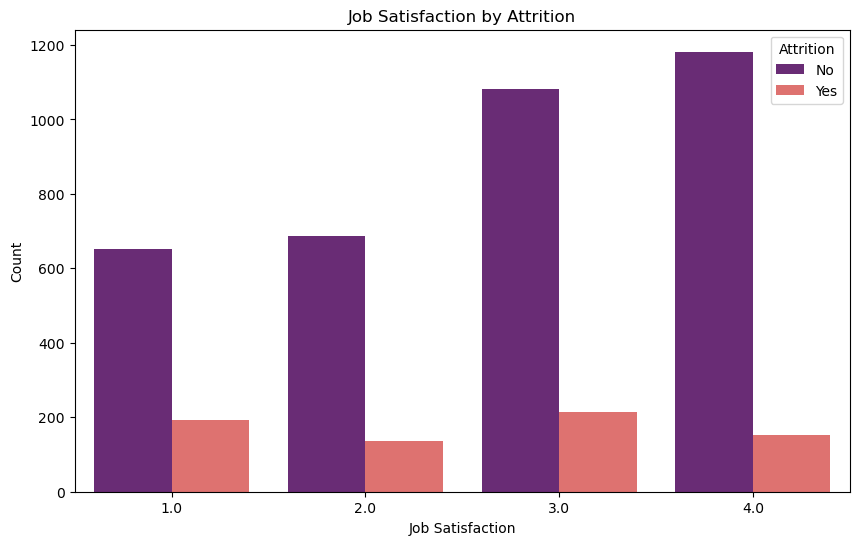

In [52]:
# Visualize the distribution of job satisfaction and its relation to attrition
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette='magma')
plt.title('Job Satisfaction by Attrition')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.show()

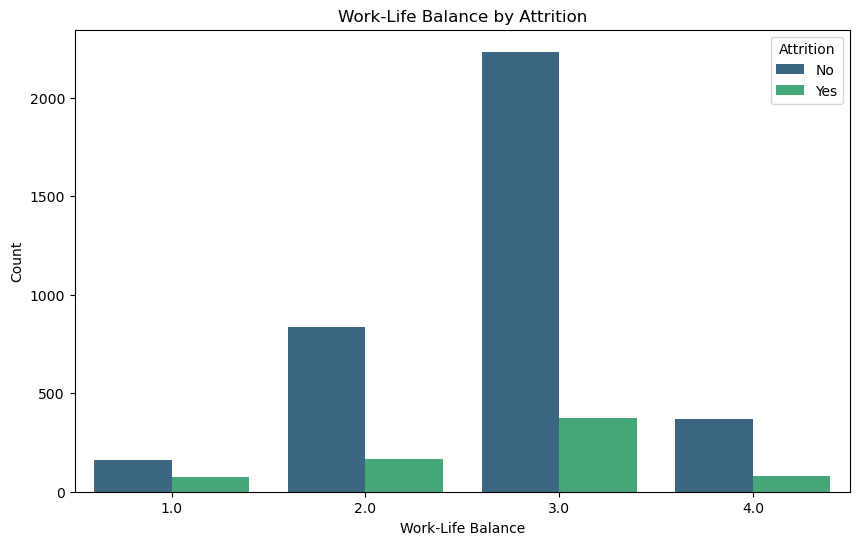

In [53]:
# Visualize the distribution of work-life balance and its relation to attrition
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition', palette='viridis')
plt.title('Work-Life Balance by Attrition')
plt.xlabel('Work-Life Balance')
plt.ylabel('Count')
plt.show()

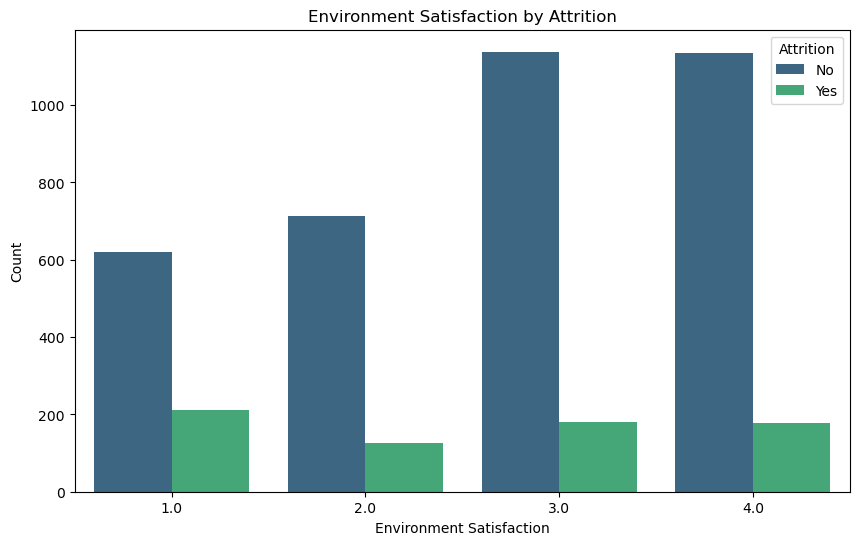

In [55]:
# Visualize the distribution of environment satisfaction and its relation to attrition
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='EnvironmentSatisfaction', hue='Attrition', palette='viridis')
plt.title('Environment Satisfaction by Attrition')
plt.xlabel('Environment Satisfaction')
plt.ylabel('Count')
plt.show()


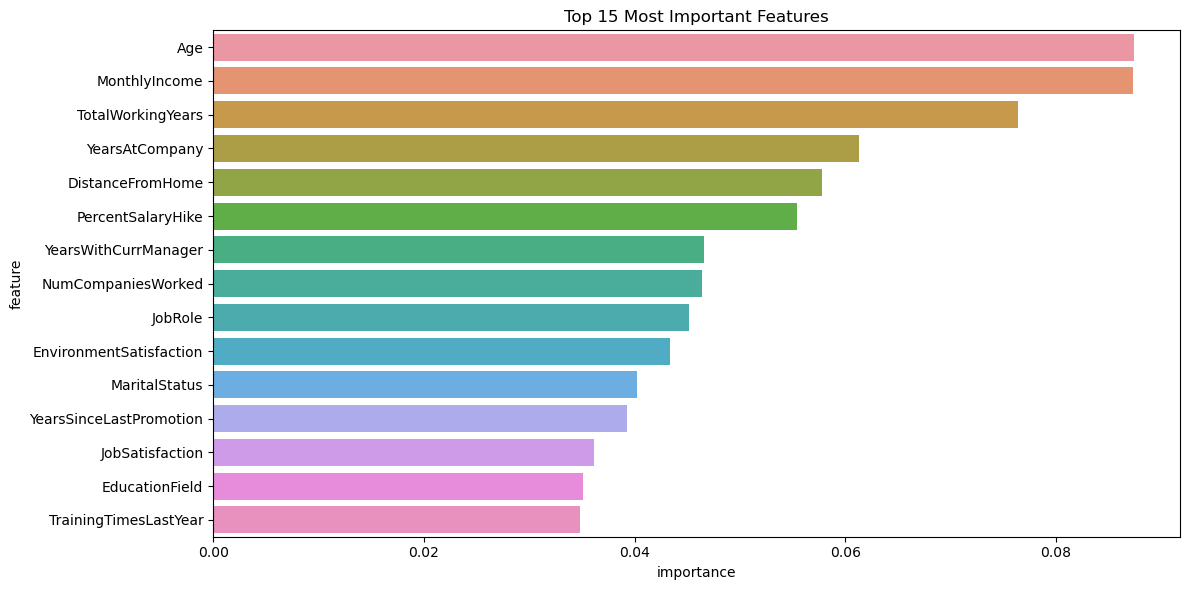

In [75]:
# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features')
plt.tight_layout()
plt.show()

In [78]:
df.to_csv('cleaned_attrition_data_for_dashboard.csv', index=False)

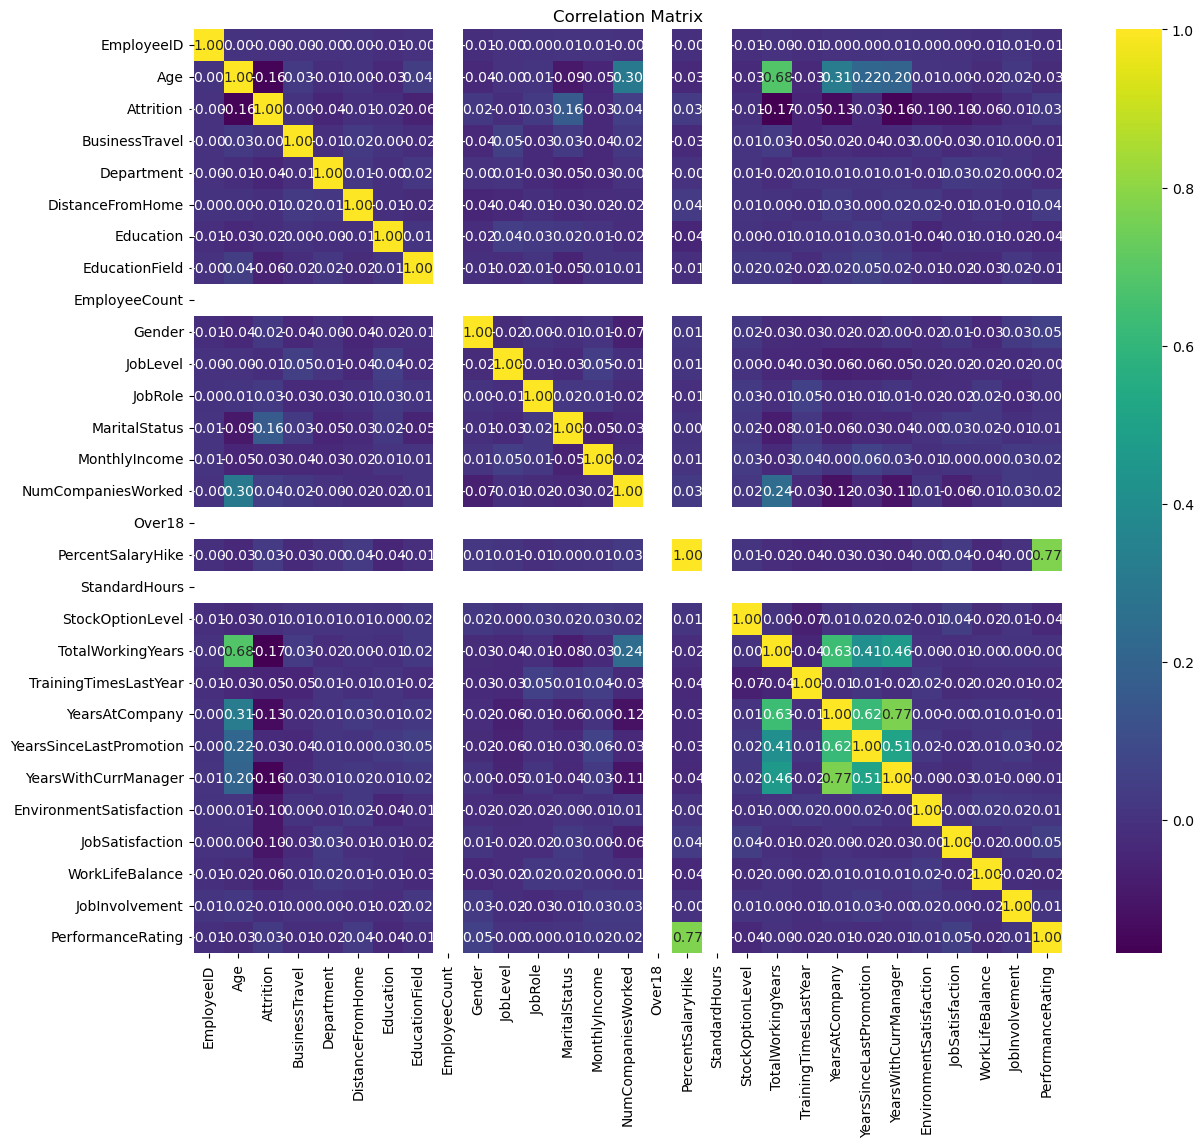

In [60]:
df_encoded = df.copy()
# Encode categorical columns
label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Visualize the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation Matrix')
plt.show()
